# Software Coaching for Python
# Week 1: Web Scraping

Instructor: Kang-Pyo Lee

In [1]:
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/Shared drives/PythonCoaching_2023Summer"
my_folder = "ljw33083418"     # *** REPLACE WITH YOUR FOLDER NAME ***

Mounted at /content/drive


In [2]:
! pip install --user --upgrade requests bs4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=23670a27b61cc065959ba23167a37aabcfcedd6ca8cc6f87f90b28a645ca31b9
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


## Fetch HTML content from a webpage using Requests

https://fivethirtyeight.com/features/argentina-and-france-lived-up-to-the-world-cup-finals-hype-and-then-transcended-it/

In [3]:
url = "https://fivethirtyeight.com/features/argentina-and-france-lived-up-to-the-world-cup-finals-hype-and-then-transcended-it/"

*** Run the cells for HTTP requests only when needed.

In [4]:
import requests

r = requests.get(url)

https://requests.kennethreitz.org/

In [5]:
r.content

b'<!DOCTYPE html>\n<html lang="en-US" class="no-js">\n<head>\n\t<meta charset="UTF-8">\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0">\n\t\t\t<link rel=\'dns-prefetch\' href=\'//dcf.espn.com\' />\n\n\t\t\n\t\t<script type="text/javascript">\n\t\t\tfunction setCountryCookie(value,days) {\n\t\t\t\tvar expires = "";\n\t\t\t\tif (days) {\n\t\t\t\t\tvar date = new Date();\n\t\t\t\t\tdate.setTime(date.getTime() + (days*24*60*60*1000));\n\t\t\t\t\texpires = "; expires=" + date.toUTCString();\n\t\t\t\t}\n\t\t\t\tdocument.cookie = "country=" + (value || "") + expires + "; path=/";\n\t\t\t}\n\n\t\t\tfunction getCountryCookie() {\n\t\t\t\tlet value = decodeURIComponent(document.cookie);\n\t\t\t\tlet parts = value.split(`; country=`);\n  \t\t\t\tif (parts.length === 2) {\n\t\t\t\t\treturn parts.pop().split(\';\').shift();\n\t\t\t\t}\n\t\t\t\treturn "";\n\t\t\t}\n\n\t\t\tvar countryCookie = getCountryCookie();\n\t\t\tif ( ! countryCookie || \'us\' !== countryCookie ) {\n\t

Note that the HTML content you have retrieved does not always corresopond to what you are actually seeing on a web browser. Web sites are able to distinguish program access from normal human access using a web browser. Some web sites do not care about the program access, whereas other web sites do care about it and block the undesirable access. In this case, take a close look at the HTML content and you will see it does not have the information you expected.  

## Load the fetched content as a BeautifulSoup object

In [6]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(r.content, "html.parser")

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

## Extract the title of the webpage

Do not confuse the title of a webpage with the title of an article.

In [7]:
soup.title

<title>Argentina And France Lived Up To The World Cup Final’s Hype — And Then Transcended It | FiveThirtyEight</title>

In [8]:
soup.title.text

'Argentina And France Lived Up To The World Cup Final’s Hype — And Then Transcended It | FiveThirtyEight'

## Extract the title of the article

If you want to extract information from a webpage, always start by identifying the corresponding HTML element in the HTML code using the Inspect feature of the Chrome Browser.

When searching for an HTML element using <b>BeautifulSoup</b>, you can use either the <b>find</b> method or <b>find_all</b> method.
- The <b>find</b> method returns the first found element.
- The <b>find_all</b> method returns a list of all found elements in order.

You can simply choose to use the <b>find</b> mehtod if you are confident that there is only one element matching or the element you are searching for is the first element matching.  

In [9]:
soup.find(name="h1", attrs={"class": "article-title article-title-single entry-title"})

<h1 class="article-title article-title-single entry-title">Argentina And France Lived Up To The World Cup Final's Hype — And Then Transcended It</h1>

https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find

In addition to specifying the tag of the element you are searching for in the first parameter `name`, you can use any clues that help identify the element by specifying them in the second parameter `attrs`. Note the `attrs` parameter takes a dictionary.

In the above example, if the class name is unique, you will always be able to find the element. If not, the <b>find</b> method will return the first found element, which could not be the element you are trying to find. In this case, you would better use different clues in the `attrs` parameter or consider using the <b>find_all</b> method.  

In [10]:
soup.find("h1", {"class": "article-title article-title-single entry-title"}).text

"Argentina And France Lived Up To The World Cup Final's Hype — And Then Transcended It"

## Extract the author name of the article

In [11]:
soup.find("a", {"class": "author url fn"})

<a class="author url fn" href="https://fivethirtyeight.com/contributors/terrence-doyle/" rel="author" title="">Terrence Doyle</a>

In [12]:
soup.find("a", {"class": "author url fn"}).text

'Terrence Doyle'

In [13]:
soup.find("a", {"class": "author url fn"})["href"]

'https://fivethirtyeight.com/contributors/terrence-doyle/'

## Fetch an image from the webpage

In [14]:
soup.find("picture", {"class": "featured-picture"})

<picture class="featured-picture">
<source media="(min-width: 768px)" srcset="https://i0.wp.com/fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?quality=90&amp;strip=info&amp;w=712&amp;ssl=1 1x, https://i0.wp.com/fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?quality=90&amp;strip=info&amp;w=1424&amp;ssl=1 2x"/>
<source srcset="https://fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?w=916 1x, https://fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?w=1832 2x"/>
<img alt="WCREAX_4x3" class="" data-sizes="(max-width: 768px) 100vw, (max-width: 1080px) 66vw, 684px" data-src="https://i0.wp.com/fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?quality=90&amp;strip=info&amp;w=1024&amp;ssl=1" data-srcset="https://i0.wp.com/fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?quality=90&amp;strip=info&amp;w=1024&amp;ssl=1 1x, https://i0.wp.com/fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?quality=90&amp;s

When the element you are searching for has no unique clues, you should try finding the parent/ancestor element, by which you can narrow down the scope of search, and then you can start another search from there. This is the beauty of hierarchical search.

In [15]:
soup.find("picture", {"class": "featured-picture"}).find("img")

<img alt="WCREAX_4x3" class="" data-sizes="(max-width: 768px) 100vw, (max-width: 1080px) 66vw, 684px" data-src="https://i0.wp.com/fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?quality=90&amp;strip=info&amp;w=1024&amp;ssl=1" data-srcset="https://i0.wp.com/fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?quality=90&amp;strip=info&amp;w=1024&amp;ssl=1 1x, https://i0.wp.com/fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?quality=90&amp;strip=info&amp;w=2048&amp;ssl=1 2x" decoding="async" sizes="(max-width: 768px) 100vw, (max-width: 1080px) 66vw, 684px" src="https://i0.wp.com/fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?quality=90&amp;strip=info&amp;w=1024&amp;ssl=1" srcset="https://i0.wp.com/fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?quality=90&amp;strip=info&amp;w=1024&amp;ssl=1 1x, https://i0.wp.com/fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?quality=90&amp;strip=info&amp;w=2048&amp;ssl=1 2x"

Because there is only one img element in the picture element found above, you do not have to add any additional attributes, or clues, in the find method.

In [16]:
soup.find("picture", {"class": "featured-picture"}).find("img")["src"]

'https://i0.wp.com/fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?quality=90&strip=info&w=1024&ssl=1'

In [17]:
img_url = soup.find("picture", {"class": "featured-picture"}).find("img")["src"]
img_url

'https://i0.wp.com/fivethirtyeight.com/wp-content/uploads/2022/12/WCREAX_4x3.jpg?quality=90&strip=info&w=1024&ssl=1'

In [18]:
from IPython.display import Image

Image(url=img_url)

Note that this is not saving the image. It is just displaying the image fetched from the website.

In [19]:
outcome_folder = f"{path}/{my_folder}/outcome"
outcome_folder

'/content/drive/Shared drives/PythonCoaching_2023Summer/ljw33083418/outcome'

In [20]:
import os

if not os.path.isdir(outcome_folder):         # Check if there is an existing directory named outcome.
    os.mkdir(outcome_folder)                  # Create a new directory named data.

The <b>os.mkdir</b>(path) function creates a directory named `path`.

We are going to save all of our outcome files in the `outcome` directory.

In [21]:
r = requests.get(img_url)

with open(f"{outcome_folder}/photo.jpg", "w+b") as fw:
    fw.write(r.content)

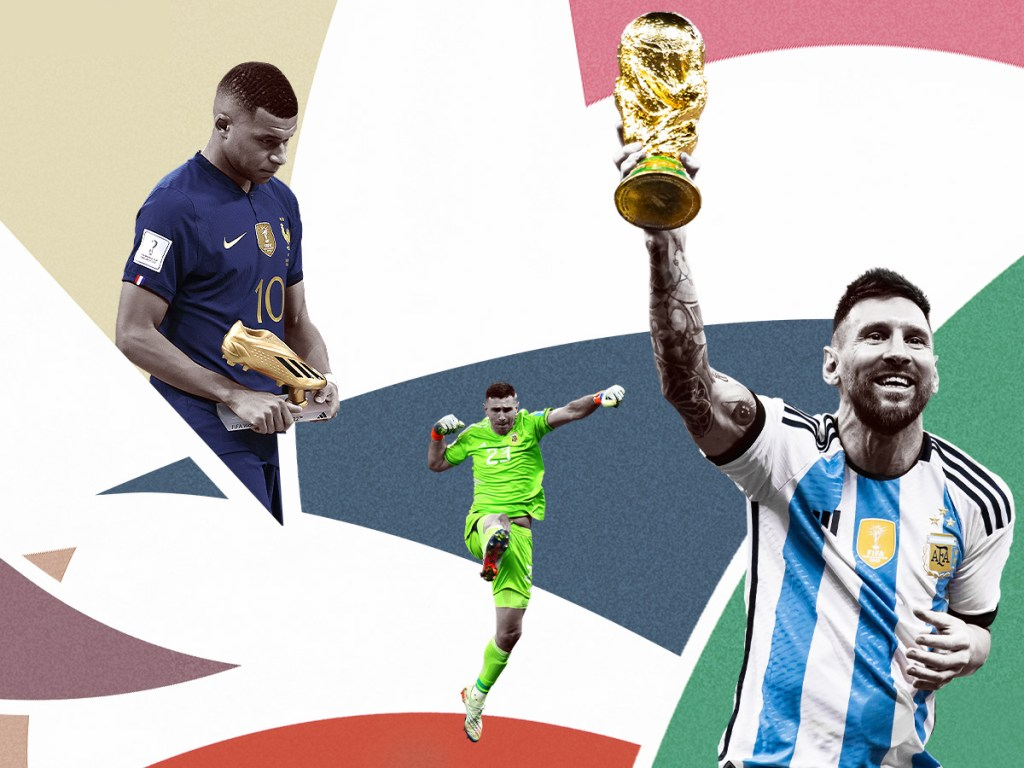

In [22]:
Image(f"{outcome_folder}/photo.jpg")

## Extract the body text of the article

In [23]:
soup.find("div", {"class": "entry-content single-post-content"})

<div class="entry-content single-post-content">
<div class="wp-block-abc-blocks-article-header abc-blocks-article-header--short-form abc-blocks-article-header--default abc-blocks-article-header--without-dek">
<div class="abc-blocks-article-header__container">
<header class="post-info single-post-header">
<div class="single-header">
<p class="single-metadata single-topic"><a class="term" href="https://fivethirtyeight.com/tag/2022-world-cup/" name="">2022 World Cup</a></p>
<h1 class="article-title article-title-single entry-title">Argentina And France Lived Up To The World Cup Final's Hype — And Then Transcended It</h1>
</div>
<div class="single-header-metadata-and-share-wrap">
<div class="single-header-metadata-wrap">
<p class="single-metadata single-byline vcard">By <a class="author url fn" href="https://fivethirtyeight.com/contributors/terrence-doyle/" rel="author" title="">Terrence Doyle</a></p>
<p class="topic single-topic">
<time class="datetime">
									Dec. 19, 2022, at 1:36 PM

In [24]:
soup.find("div", {"class": "entry-content single-post-content"}).text

"\n\n\n\n\n2022 World Cup\nArgentina And France Lived Up To The World Cup Final's Hype — And Then Transcended It\n\n\n\nBy Terrence Doyle\n\n\n\t\t\t\t\t\t\t\t\tDec. 19, 2022, at 1:36 PM\t\t\t\t\t\t\t\t\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\nPHOTO ILLUSTRATION BY DAN DAO / GETTY IMAGES\n\n\n\n\nThe 2022 FIFA World Cup Final was simultaneously billed as a heavyweight bout between Argentina and France (two of the world’s most iconic and successful soccer-playing nations) and Kylian Mbappé and Lionel Messi (two of the best players to ever set foot on a pitch). And the match certainly lived up to its billing — even if it took more than an hour to find its footing as an all-time classic. \nThe game’s roller-coaster ride lifted Argentina early, as La Albiceleste was dominant in the first half — it won the expected goals (xG) battle by a whopping 1.49 (including one penalty shot) to 0.00, according to StatsBomb.1 After just 36 minutes, Argentina found itself up 2-0 against a French team that cou

In [25]:
soup.find("div", {"class": "entry-content single-post-content"}).text.replace("\n", " ").replace("\t", " ").strip()

"2022 World Cup Argentina And France Lived Up To The World Cup Final's Hype — And Then Transcended It    By Terrence Doyle            Dec. 19, 2022, at 1:36 PM                           PHOTO ILLUSTRATION BY DAN DAO / GETTY IMAGES     The 2022 FIFA World Cup Final was simultaneously billed as a heavyweight bout between Argentina and France (two of the world’s most iconic and successful soccer-playing nations) and Kylian Mbappé and Lionel Messi (two of the best players to ever set foot on a pitch). And the match certainly lived up to its billing — even if it took more than an hour to find its footing as an all-time classic.  The game’s roller-coaster ride lifted Argentina early, as La Albiceleste was dominant in the first half — it won the expected goals (xG) battle by a whopping 1.49 (including one penalty shot) to 0.00, according to StatsBomb.1 After just 36 minutes, Argentina found itself up 2-0 against a French team that couldn’t find a single first-half shot,2 let alone a first-hal

## Extract a list of article titles

https://fivethirtyeight.com/features/

In [26]:
url = "https://fivethirtyeight.com/features/"
r = requests.get(url)
soup = BeautifulSoup(r.content, "html.parser")

In [27]:
h2_list = soup.find_all("h2", {"class": "article-title entry-title"})
h2_list

[<h2 class="article-title entry-title">
 <a data-content-type="feature" data-post-id="361887" data-section-1="politics" data-section-2="politics:governors" href="https://fivethirtyeight.com/features/pennsylvania-governor-josh-shapiro-approval-polls-i-95-bridge-collapse/" name="&amp;lpos=fivethirtyeightFeature&amp;lid=Feature1">
 				How Pennsylvania’s Governor Turned A Collapsed Bridge Into A Political Win			</a>
 </h2>,
 <h2 class="article-title entry-title">
 <a data-content-type="feature" data-post-id="361860" data-section-1="politics" data-section-2="politics:2024 election" href="https://fivethirtyeight.com/features/third-party-candidate-spoiler-trump-biden/" name="&amp;lpos=fivethirtyeightFeature&amp;lid=Feature2">
 				Why A Third-Party Candidate Might Help Trump — And Spoil The Election For Biden			</a>
 </h2>,
 <h2 class="article-title entry-title">
 <a data-content-type="feature" data-post-id="361858" data-section-1="politics" data-section-2="politics:2024 election" href="http

https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all

The <b>find_all</b> method looks through a tag’s descendants and retrieves all descendants that match your filters.

In [28]:
len(h2_list)

9

In [29]:
for h2 in h2_list:
    print(h2.text.strip())

How Pennsylvania’s Governor Turned A Collapsed Bridge Into A Political Win
Why A Third-Party Candidate Might Help Trump — And Spoil The Election For Biden
Which 2024 Candidates Had The Best — And Worst — Campaign Launches?
Biden Says The Economy’s Doing Great. Lots Of His Own Voters Don’t Believe Him.
Why Americans Aren’t Feeling ‘Bidenomics’
How Vivek Ramaswamy Became A Major Presidential Candidate
The Supreme Court Had A Few Surprises This Year. That Doesn’t Make It Moderate.
Extremist-Related Mass Killings Have Been On The Rise
Why Biden Probably Won’t Get A Serious Primary Challenger


In [30]:
for h2 in h2_list:
    url = h2.find("a")["href"]     # Starting from each h2 element, go deeper by one level to find an a element
    print(url)

https://fivethirtyeight.com/features/pennsylvania-governor-josh-shapiro-approval-polls-i-95-bridge-collapse/
https://fivethirtyeight.com/features/third-party-candidate-spoiler-trump-biden/
https://fivethirtyeight.com/features/which-2024-candidates-had-the-best-and-worst-campaign-launches/
https://fivethirtyeight.com/features/biden-says-the-economys-doing-great-lots-of-his-own-voters-dont-believe-him/
https://fivethirtyeight.com/videos/why-americans-arent-feeling-bidenomics/
https://fivethirtyeight.com/features/vivek-ramaswamy-2024-republican-primary/
https://fivethirtyeight.com/features/the-supreme-court-had-a-few-surprises-this-year-that-doesnt-make-it-moderate/
https://fivethirtyeight.com/features/extremism-mass-casualty-events-shootings/
https://fivethirtyeight.com/features/why-biden-probably-wont-get-a-serious-primary-challenger/


The hierarchical search of BeautifulSoup is very useful in navigating the nested HTML elements.